<a href="https://colab.research.google.com/github/Karampruthi/CE888-Data-Science-Decision-making/blob/main/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pycomp.viz.insights import *
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pip install pycomp

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', delimiter = ";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data_clean = data.drop(['duration','y'],axis =1)
target = data['y']

In [5]:
data_clean.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data_clean.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [7]:
object_col = []
for i in data_clean:
  if data_clean[i].dtypes == 'object':
    print(i.upper(),' >>>>',data_clean[i].unique())
    object_col.append(i)

JOB  >>>> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
MARITAL  >>>> ['married' 'single' 'divorced' 'unknown']
EDUCATION  >>>> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
DEFAULT  >>>> ['no' 'unknown' 'yes']
HOUSING  >>>> ['no' 'yes' 'unknown']
LOAN  >>>> ['no' 'yes' 'unknown']
CONTACT  >>>> ['telephone' 'cellular']
MONTH  >>>> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
DAY_OF_WEEK  >>>> ['mon' 'tue' 'wed' 'thu' 'fri']
POUTCOME  >>>> ['nonexistent' 'failure' 'success']


In [8]:
data_clean = pd.get_dummies(data_clean, columns=object_col)

In [9]:
data_clean.shape

(41188, 62)

In [10]:
target.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

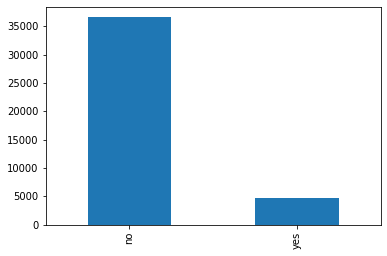

In [11]:
target.value_counts().plot(kind='bar')

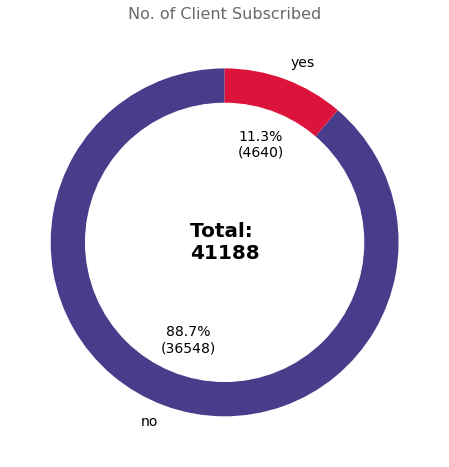

In [12]:
plot_donut_chart(df=data, col='y',title='No. of Client Subscribed') 

In [13]:
inputs = data_clean.copy()
min_max_scaler = MinMaxScaler()
input = min_max_scaler.fit_transform(inputs.values.reshape(-1,len(inputs.columns)))
target = target.apply(lambda x: 1 if x=='yes' else 0)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2,random_state=50,stratify=target)

In [15]:
y_train.value_counts()

0    29238
1     3712
Name: y, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=100,max_depth=3)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
RFC = RandomForestClassifier(n_estimators=100,max_depth=12,random_state=60)
RFC.fit(x_train,y_train)
f1_score(y_test,RFC.predict(x_test))

0.37337413925019125

In [55]:
importances = RFC.feature_importances_
std = np.std([tree.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
features = data_clean.columns
# Print the feature ranking
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

[ 7  8  2 61  4  0  6  5  1  3 59 60 52 49 43 50 42 55 31 38 36 56 54 23
 57 22 44 28 58  9 39 10 14 41 18 30 27 48 17 33 21 34 25 53 16 32 13 26
 19 15 51 45 47 12 37 40 11 20 46 24 29 35]
Feature ranking:
1. euribor3m (0.137780)
2. nr.employed (0.116927)
3. pdays (0.074017)
4. poutcome_success (0.069784)
5. emp.var.rate (0.061363)
6. age (0.060166)
7. cons.conf.idx (0.055543)
8. cons.price.idx (0.048979)
9. campaign (0.026308)
10. previous (0.025351)
11. poutcome_failure (0.016382)
12. poutcome_nonexistent (0.014782)
13. month_oct (0.013438)
14. month_mar (0.012811)
15. contact_telephone (0.012810)
16. month_may (0.012357)
17. contact_cellular (0.012290)
18. day_of_week_mon (0.010371)
19. education_university.degree (0.009047)
20. housing_yes (0.008521)
21. housing_no (0.008431)
22. day_of_week_thu (0.008164)
23. day_of_week_fri (0.007796)
24. marital_single (0.007611)
25. day_of_week_tue (0.007523)
26. marital_married (0.007450)
27. month_apr (0.007437)
28. education_high.school (0.

In [34]:
cv_RFC.mean()

0.30024931159449253

In [17]:
RFC.score(x_test,y_test)

0.8999757222626851

In [18]:
cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=1)         
cv_RFC = cross_val_score(RFC, x_test, y_test, cv=cv,scoring='accuracy')

In [19]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(x_train,y_train)
dummy_clf.score(x_test,y_test)
cv_dummy = cross_val_score(dummy_clf, x_test, y_test, cv=cv,scoring='accuracy')

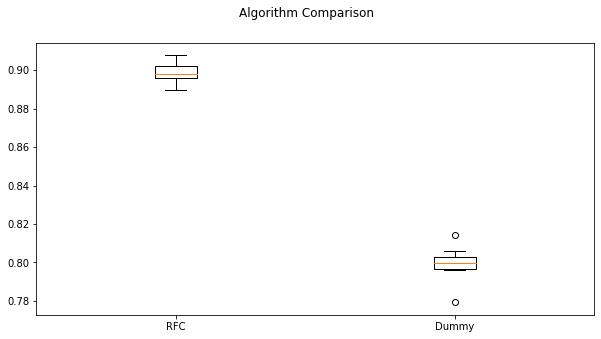

In [20]:
fig = plt.figure(figsize = (10,5)) 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot([cv_RFC,cv_dummy]) 
ax.set_xticklabels(['RFC','Dummy'])
plt.show()

In [26]:
grid_search = GridSearchCV(estimator=RFC,
             param_grid={'n_estimators': [50,100,200,500,1000], 'max_depth': range(3,18),'criterion':('entropy','gini')},cv=cv)
grid_search.fit(x_train,y_train)
print('best_score ->',grid_search.best_score_)
print('best_params ->',grid_search.best_params_)

KeyboardInterrupt: ignored

In [27]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']